# Institutes losing the most

Determine the Termination Impact Index for NIH Institutions, listed as `program_office`.

In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import requests
import re

df = pd.read_csv("/content/2024-04-07-NIH Grant Terminations_ Auto-Generated - grant_data.csv")

# Drop any rows where the 'cancellation_source' column is not 'HHS reported' or 'Self reported'
df_confirmed = df[df['cancellation_source'].isin(['HHS reported', 'Self reported', 'Self and HHS reported'])]
total_grants_count = len(df_confirmed)
print(f"There are {total_grants_count} rows in the dataframe.")

There are 770 rows in the dataframe.


In [2]:
# NIH IC (institute/centre) correspond to the 'program_office' column.
# Count the entries for each 'program_office'
df_confirmed['program_office'].value_counts()

,count
program_office,
NIMH,131
NIMHD,88
NIAID,85
NICHD,64
NCI,56
NIGMS,52
NIDA,51
NIA,41
NIAAA,36


In [3]:
# Calculate the total amount of 'award_remaining' for each 'program_office'
program_office_remaining = df_confirmed.groupby('program_office')['award_remaining'].sum().sort_values(ascending=False).reset_index()

In [4]:
program_office_remaining.head()

,program_office,award_remaining
0,NIAID,1.269817e+09
1,NIMHD,1.948401e+08
2,NCATS,1.300439e+08
3,NCI,1.195100e+08
4,NIMH,1.088181e+08


## Download funding data by institute 2020-23 from the NIH Almanac:

Section 1: https://www.nih.gov/about-nih/what-we-do/nih-almanac/appropriations-section-1

Section 2: https://www.nih.gov/about-nih/what-we-do/nih-almanac/appropriations-section-2

In [5]:
section_1_url = "https://www.nih.gov/about-nih/what-we-do/nih-almanac/appropriations-section-1"
section_2_url = "https://www.nih.gov/about-nih/what-we-do/nih-almanac/appropriations-section-2"

In [6]:
def get_table_from_nih_website(url, number_of_cols):
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")

  table = soup.find("table", {"class": "table-data-tight"})

  # Extract headers - ignoring text in any additional <sup> elements
  headers = [th.contents[0].text.strip() for th in table.find_all("th")]

  # Extract rows
  rows = []
  for tr in table.find_all("tr"):
      row_data = [int(re.sub(r'[(),]', '', td.text.strip()))
                  if td.text.strip()
                  else 0
                  for td in tr.find_all("td")]
      if row_data:  # Skip empty rows
          rows.append(row_data)
  # Create the pandas DataFrame
  df = pd.DataFrame(rows, columns=headers[1:number_of_cols])

  return df

In [7]:
section_1_df = get_table_from_nih_website(section_1_url, 15)
section_2_df = get_table_from_nih_website(section_2_url, 16)

In [8]:
section_1_df.tail()

,NCI,NHLBI,NIDCR,NIDDK,NINDS,NIAID,NIGMS,NICHD,NEI,NIEHS,NIA,NIAMS,NIDCD,NIMH
82,6143892,3488335,461781,2179823,2274413,5523324,2872780,1506458,796536,852056,3083410,605065,474404,1870296
83,6440442,3624258,477429,2264314,2444687,5885470,2937218,1556879,824090,883598,3543673,624889,490692,2038374
84,6559852,3664811,484867,2281975,2513393,6069619,2991417,1590337,835714,896175,3899227,634292,498076,2103708
85,6912522,3808494,501231,2345376,2611370,6322728,3092373,1683009,863918,924709,4219936,655699,514885,2216976
86,7320159,3982345,520163,2442171,2813925,6562279,3239679,1749078,896549,997014,4407623,685465,534333,2337843


In [9]:
section_2_df.tail()

,NIDA,NIAAA,NINR,NHGRI,NIBIB,NIMHD,NCRR,NCCAM,NCATS,FIC,NLM,OD,B&F,OAR,Total
82,1419844,525591,162992,575579,389464,314679,0,146473,806373,78109,441997,2117675,200000,0,39311349
83,1462016,545373,169113,606349,403638,335812,0,151740,832888,80760,456911,2409387,200000,0,41690000
84,1479660,554923,174957,615780,410728,390865,0,154162,855421,84044,463787,2532710,200000,0,42940500
85,1595474,573651,180862,639062,424590,459056,0,159365,882265,86880,479439,2779120,250000,0,45182990
86,1662695,595318,197693,663200,440627,524395,0,170384,923323,95162,497548,3074514,350000,0,47683485


In [10]:
# Combine the DataFrames
combined_df = pd.concat([section_1_df, section_2_df], axis=1)


In [11]:
combined_df.tail(4)

,NCI,NHLBI,NIDCR,NIDDK,NINDS,NIAID,NIGMS,NICHD,NEI,NIEHS,...,NIMHD,NCRR,NCCAM,NCATS,FIC,NLM,OD,B&F,OAR,Total
83,6440442,3624258,477429,2264314,2444687,5885470,2937218,1556879,824090,883598,...,335812,0,151740,832888,80760,456911,2409387,200000,0,41690000
84,6559852,3664811,484867,2281975,2513393,6069619,2991417,1590337,835714,896175,...,390865,0,154162,855421,84044,463787,2532710,200000,0,42940500
85,6912522,3808494,501231,2345376,2611370,6322728,3092373,1683009,863918,924709,...,459056,0,159365,882265,86880,479439,2779120,250000,0,45182990
86,7320159,3982345,520163,2442171,2813925,6562279,3239679,1749078,896549,997014,...,524395,0,170384,923323,95162,497548,3074514,350000,0,47683485


In [12]:
total_ic_funding_2020_23 = combined_df.tail(4).sum().reset_index()
total_ic_funding_2020_23.columns = ['ic', 'funding_2020_23']

In [13]:
total_ic_funding_2020_23.head()

,ic,funding_2020_23
0,NCI,27232975
1,NHLBI,15079908
2,NIDCR,1983690
3,NIDDK,9333836
4,NINDS,10383375


## Download funding data for 2024 by institute from NIH RePORT:

https://report.nih.gov/award/index.cfm?ot=&fy=2024&state=&ic=&fm=&orgid=&distr=&rfa=&om=n&pid=#tabic

In [14]:
url_2024 = "https://report.nih.gov/award/index.cfm?ot=&fy=2024&state=&ic=&fm=&orgid=&distr=&rfa=&om=n&pid=#tabic"

In [15]:
response = requests.get(url_2024)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", {"id": "ictable"})

In [16]:
headers = ["ic", "award", "funding_2024"]

In [17]:
# Extract rows
rows = []
for tr in table.find("tbody").find_all("tr"):
    row_data = [td.text.strip() for td in tr.find_all("td")]
    if row_data:  # Skip empty rows
        rows.append(row_data)

In [18]:
df_2024 = pd.DataFrame(rows, columns=headers)

In [19]:
# Convert the 'funding' column to numeric values
df_2024['funding_2024'] = df_2024['funding_2024'].astype(str).str.replace(r'[$,]', '', regex=True)
df_2024['funding_2024'] = pd.to_numeric(df_2024['funding_2024'], errors='coerce')

In [20]:
df_2024.head()

,ic,award,funding_2024
0,FIC,439,101954503
1,NCATS,367,657086368
2,NCCIH,340,174692939
3,NCI,"8,800",5317422047
4,NEI,"1,722",698967040


## Join the funding 2020-23 data with the 2024 funding data

In [21]:
# Merge the two dataframes
merged_funding_df = pd.merge(total_ic_funding_2020_23, df_2024, on='ic', how='left')

In [22]:
# Join the 2020-23 funding with the 2024 funding
# 2020-23 values are in thousands so times by 1000
merged_funding_df['total_funding'] = (merged_funding_df['funding_2020_23'] * 1000) + merged_funding_df['funding_2024']

In [23]:
merged_funding_df.head()

,ic,funding_2020_23,award,funding_2024,total_funding
0,NCI,27232975,"8,800",5.317422e+09,3.255040e+10
1,NHLBI,15079908,"6,264",3.892735e+09,1.897264e+10
2,NIDCR,1983690,947,3.935334e+08,2.377223e+09
3,NIDDK,9333836,"4,353",2.005246e+09,1.133908e+10
4,NINDS,10383375,"4,792",2.471058e+09,1.285443e+10


## Join the total funding 2019-2023 with funding remaining by IC

In [24]:
# Merge the two dataframes
ic_merged_df = merged_funding_df.merge(program_office_remaining, left_on='ic', right_on='program_office')

In [25]:
ic_merged_df.head()

,ic,funding_2020_23,award,funding_2024,total_funding,program_office,award_remaining
0,NCI,27232975,"8,800",5.317422e+09,3.255040e+10,NCI,1.195100e+08
1,NHLBI,15079908,"6,264",3.892735e+09,1.897264e+10,NHLBI,3.080930e+07
2,NIDCR,1983690,947,3.935334e+08,2.377223e+09,NIDCR,2.885507e+06
3,NIDDK,9333836,"4,353",2.005246e+09,1.133908e+10,NIDDK,4.374796e+07
4,NINDS,10383375,"4,792",2.471058e+09,1.285443e+10,NINDS,4.730407e+07


In [26]:
# Add a column for the the remaining award amount, as a percentage of the total funding for 2020-2024
ic_merged_df['award_remaining_percentage'] = (ic_merged_df['award_remaining'] / ic_merged_df['total_funding']) * 100

In [27]:
ic_merged_df.head()

,ic,funding_2020_23,award,funding_2024,total_funding,program_office,award_remaining,award_remaining_percentage
0,NCI,27232975,"8,800",5.317422e+09,3.255040e+10,NCI,1.195100e+08,0.367154
1,NHLBI,15079908,"6,264",3.892735e+09,1.897264e+10,NHLBI,3.080930e+07,0.162388
2,NIDCR,1983690,947,3.935334e+08,2.377223e+09,NIDCR,2.885507e+06,0.121381
3,NIDDK,9333836,"4,353",2.005246e+09,1.133908e+10,NIDDK,4.374796e+07,0.385816
4,NINDS,10383375,"4,792",2.471058e+09,1.285443e+10,NINDS,4.730407e+07,0.367998


In [28]:
# Drop the 'award' column
ic_merged_df = ic_merged_df.drop(columns=['award'])

# Print to a CSV file
ic_merged_df.to_csv('/content/ic_total_funding_percent.csv', index=False)


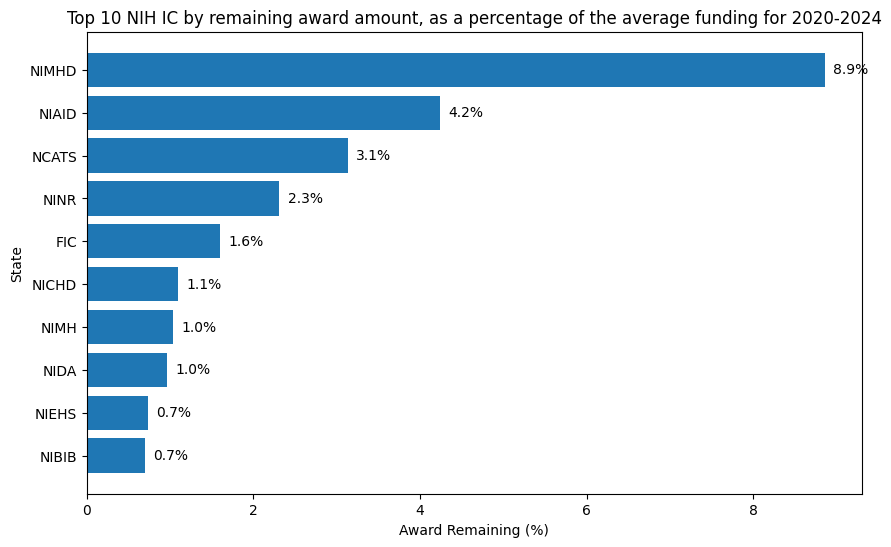

In [29]:
# Sort by award_remaining and get the top 10
top_10_ic = ic_merged_df.sort_values('award_remaining_percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_10_ic['ic'], top_10_ic['award_remaining_percentage'])
plt.xlabel('Award Remaining (%)')
plt.ylabel('State')
plt.title('Top 10 NIH IC by remaining award amount, as a percentage of the average funding for 2020-2024')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2.,
            '{:.1f}%'.format(p.get_width()),
            ha='left', va='center')

plt.show()